# Data Exploration

In [1]:
# Load the Dataset and Perform Exploratory Data Analysis (EDA)
import pandas as pd

# Load the datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:6: SyntaxWarning: invalid escape sequence '\L'
<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:6: SyntaxWarning: invalid escape sequence '\L'
C:\Users\lbt99\AppData\Local\Temp\ipykernel_17984\98261590.py:5: SyntaxWarning: invalid escape sequence '\L'
  train_data = pd.read_csv('D:\Logistic Regression\Titanic_train.csv')
C:\Users\lbt99\AppData\Local\Temp\ipykernel_17984\98261590.py:6: SyntaxWarning: invalid escape sequence '\L'
  test_data = pd.read_csv('D:\Logistic Regression\Titanic_test.csv')


In [2]:
# Display the first few rows of the training data
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Check the data types of each feature
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Get summary statistics for numerical features
print(train_data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Get summary statistics for categorical features
print(train_data.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


# Visualizations

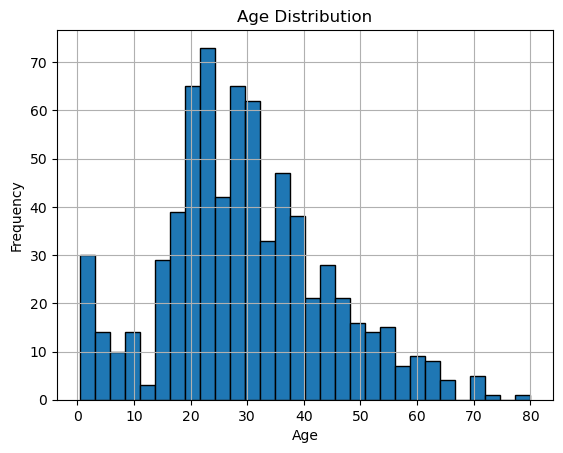

In [6]:
# Histograms:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
train_data['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

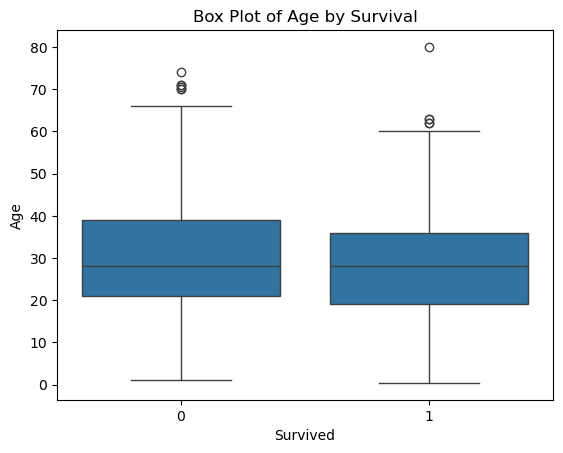

In [7]:
# Box plot for Age vs Survived
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Box Plot of Age by Survival')
plt.show()

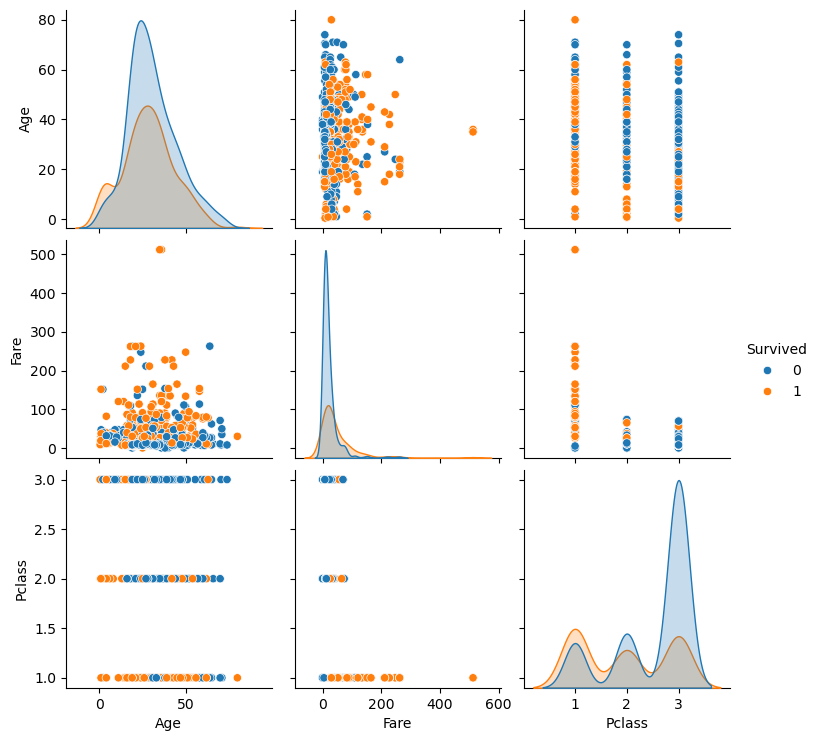

In [8]:
# Pair plot for selected features
sns.pairplot(train_data, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

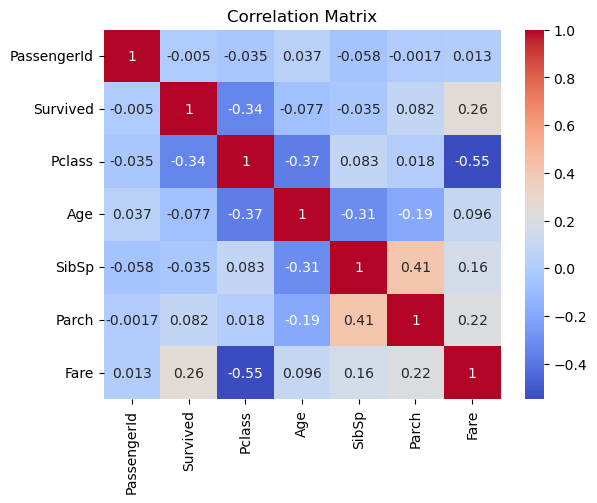

In [10]:
# Correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [11]:
# Handle Missing Values

# Fill missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Check for remaining missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\lbt99\AppData\Local\Temp\ipykernel_17984\2898327121.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\lbt99\AppData\Local\Temp\ipykernel_17984\2898327121.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [12]:
# Encode Categorical Variables
# Convert categorical variables into dummy/indicator variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Model Building

In [13]:
# Build a Logistic Regression Model
# Import required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# Model Evaluation

In [15]:
# Evaluate Model Performance
# Import Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [16]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8824967824967825


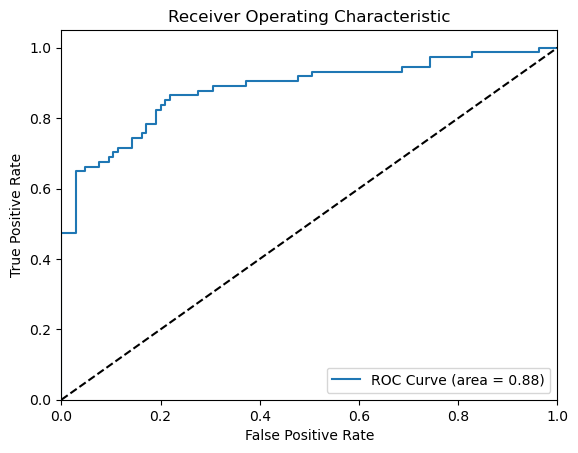

In [17]:
# Visualize ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Interpretation

In [18]:
# Interpret the Coefficients of the Logistic Regression Model
# Get the coefficients of the model
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))

      Feature  Coefficient
4        Fare     0.002592
1         Age    -0.030494
3       Parch    -0.108488
6  Embarked_Q    -0.111237
2       SibSp    -0.294911
7  Embarked_S    -0.398404
0      Pclass    -0.937033
5    Sex_male    -2.593063


In [19]:
# Save the model
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']